In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
#from keras.layers import Input, Dense, Activation, Flatten, Conv2D, Lambda
#from keras.layers import MaxPooling2D, Dropout
#from keras.utils import print_summary
#from keras.models import Sequential
#from keras.callbacks import ModelCheckpoint
import pickle
#from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn import datasets, svm
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
import statsmodels.api as sm
import statsmodels.base as smb
import pandas as pd
# Warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns


warnings.filterwarnings('ignore')

ImportError: No module named keras.wrappers.scikit_learn

In [2]:
# Load
df = pd.read_csv(r"C:\Users\User\Desktop\2019 Spring\Talem Health\Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv", header =0)

NameError: name 'pd' is not defined

In [82]:
df.head()
df.shape

(2346931, 37)

In [4]:
df.rehab = df.loc[df['APR DRG Code'] == 860]
list(df.rehab)

## Processing
# Drop Unwanted
df.rehab.drop(["Health Service Area","Operating Certificate Number","Hospital County","Zip Code - 3 digits","Facility Id","Facility Name","Discharge Year",
         "APR DRG Code","APR DRG Description","APR MDC Description","APR MDC Code","APR Severity of Illness Code","APR Medical Surgical Description",
        "Payment Typology 1", "Payment Typology 2", "Payment Typology 3", "Attending Provider License Number",
        "Operating Provider License Number", "Other Provider License Number", "Birth Weight", "Abortion Edit Indicator",
        "CCS Diagnosis Code", "CCS Procedure Code", "Emergency Department Indicator"],axis=1,inplace=True)


In [78]:
list(df.rehab)

['Health Service Area',
 'Hospital County',
 'Operating Certificate Number',
 'Facility Id',
 'Facility Name',
 'Age Group',
 'Zip Code - 3 digits',
 'Gender',
 'Race',
 'Ethnicity',
 'Length of Stay',
 'Type of Admission',
 'Patient Disposition',
 'Discharge Year',
 'CCS Diagnosis Code',
 'CCS Diagnosis Description',
 'CCS Procedure Code',
 'CCS Procedure Description',
 'APR DRG Code',
 'APR DRG Description',
 'APR MDC Code',
 'APR MDC Description',
 'APR Severity of Illness Code',
 'APR Severity of Illness Description',
 'APR Risk of Mortality',
 'APR Medical Surgical Description',
 'Payment Typology 1',
 'Payment Typology 2',
 'Payment Typology 3',
 'Attending Provider License Number',
 'Operating Provider License Number',
 'Other Provider License Number',
 'Birth Weight',
 'Abortion Edit Indicator',
 'Emergency Department Indicator',
 'Total Charges',
 'Total Costs']

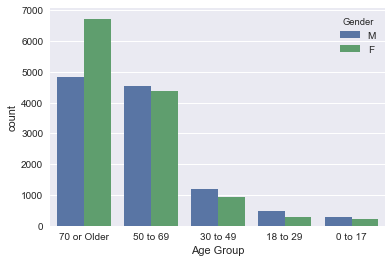

In [31]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Age Group",hue="Gender",data=df.rehab)

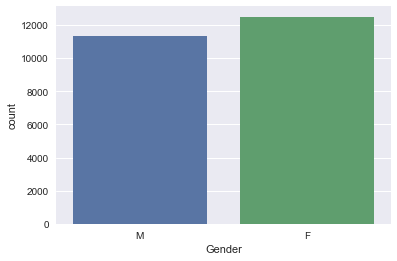

In [32]:
ax1 = sns.countplot(x="Gender", data=df.rehab)


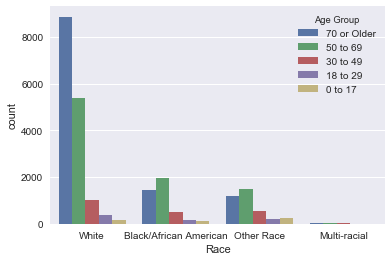

In [33]:
ax2 = sns.countplot(x="Race", hue="Age Group", data=df.rehab)


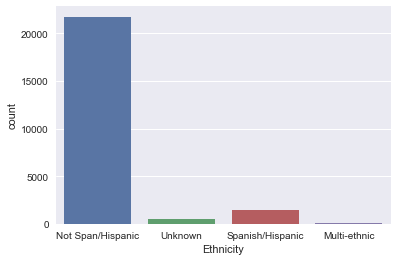

In [34]:
ax3 = sns.countplot(x="Ethnicity", data=df.rehab)


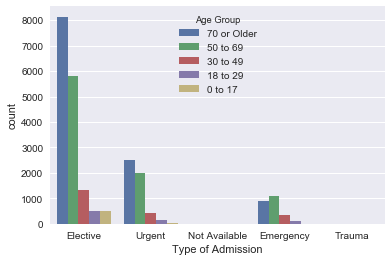

In [35]:
ax4 = sns.countplot(x="Type of Admission",hue = "Age Group",data=df.rehab)


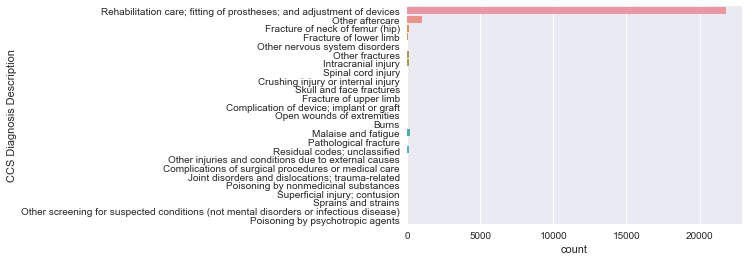

In [37]:

ax6 = sns.countplot(y="CCS Diagnosis Description", data=df.rehab)

In [38]:
# target variable distribution
df.rehab.groupby(['CCS Diagnosis Description'])[['CCS Diagnosis Description']].count()


,CCS Diagnosis Description
CCS Diagnosis Description,
Burns,5
Complication of device; implant or graft,9
Complications of surgical procedures or medical care,2
Crushing injury or internal injury,8
Fracture of lower limb,64
Fracture of neck of femur (hip),166
Fracture of upper limb,18
Intracranial injury,142
Joint disorders and dislocations; trauma-related,2


In [75]:
df.rehab1.columns

Index(['Len_of_Stay', 'Total_Charges', 'Gender_M', 'Age Group_18 to 29',
       'Age Group_30 to 49', 'Age Group_50 to 69', 'Age Group_70 or Older',
       'Race_Multi-racial', 'Race_Other Race', 'Race_White',
       'Ethnicity_Not Span/Hispanic', 'Ethnicity_Spanish/Hispanic',
       'Ethnicity_Unknown', 'Type of Admission_Emergency',
       'Type of Admission_Not Available', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'Patient_Disp_Home w/ Home Health Services',
       'Patient_Disp_Other', 'Patient_Disp_Short-term Hospital',
       'Patient_Disp_Skilled Nursing Home', 'CCS_Diag_Other aftercare',
       'CCS_Diag_Rehabilitation care; fitting of prostheses; and adjustment of devices',
       'CCS_Proc_DX PHYSICAL THERAPY', 'CCS_Proc_NO PROC',
       'CCS_Proc_OT PHYS THER/REHAB', 'CCS_Proc_Other',
       'CCS_Proc_PHYS THER EXER, MANIPUL',
       'APR Severity of Illness Description_Major',
       'APR Severity of Illness Description_Minor',
       'APR Severity of I

In [76]:
#ax5 = sns.countplot(y="Patient Disposition", data=df.rehab)
#axx = sns.countplot(y="Emergency Department Indicator_Y", data=df.rehab)
df.rehab1.groupby(['Emergency Department Indicator_Y'])[['Emergency Department Indicator_Y']].count()


,Emergency Department Indicator_Y
Emergency Department Indicator_Y,
0,23660
1,125


In [41]:
# target variable distribution
df.rehab.groupby(['Patient Disposition'])[['Patient Disposition']].count()


,Patient Disposition
Patient Disposition,
Another Type Not Listed,32
Cancer Center or Children's Hospital,14
Court/Law Enforcement,4
Critical Access Hospital,1
Expired,49
Facility w/ Custodial/Supportive Care,49
Federal Health Care Facility,3
Home or Self Care,6825
Home w/ Home Health Services,10251


In [42]:

df.rehab.rename(columns= {'Patient Disposition':'Patient_Disp', 'Length of Stay':'Len_of_Stay',
                         'CCS Diagnosis Description':'CCS_Diag','CCS Procedure Description':'CCS_Proc', 'Total Charges':'Total_Charges'}, inplace=True)
df.rehab.columns

Index(['Age Group', 'Gender', 'Race', 'Ethnicity', 'Len_of_Stay',
       'Type of Admission', 'Patient_Disp', 'CCS_Diag', 'CCS_Proc',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'Emergency Department Indicator', 'Total_Charges'],
      dtype='object')

In [43]:


#Mask by finding percentage of occupency
series = pd.value_counts(df.rehab.CCS_Diag)
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
df.rehab['CCS_Diag'] = np.where(df.rehab['CCS_Diag'].isin(series[mask].index),'Other',df.rehab['CCS_Diag'])
#To change the index with sum :
new = series[~mask]
new['Other'] = series[mask].sum()
pd.value_counts(df.rehab.CCS_Diag)

Rehabilitation care; fitting of prostheses; and adjustment of devices    21800
Other aftercare                                                           1041
Other                                                                      983
Name: CCS_Diag, dtype: int64

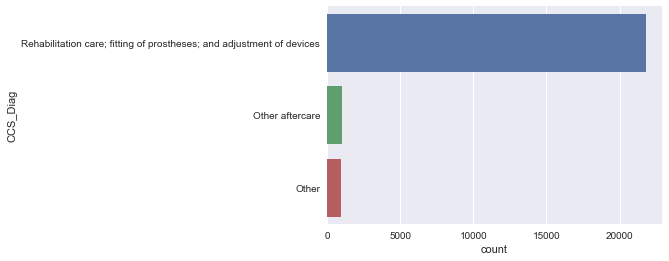

In [44]:
ax7 = sns.countplot(y="CCS_Diag", data=df.rehab)

In [45]:
pd.value_counts(df.rehab.Patient_Disp)
#Mask by finding percentage of occupency
series = pd.value_counts(df.rehab.Patient_Disp)
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
df.rehab['Patient_Disp'] = np.where(df.rehab['Patient_Disp'].isin(series[mask].index),'Other',df.rehab['Patient_Disp'])
#To change the index with sum :
new = series[~mask]
new['Other'] = series[mask].sum()


In [46]:
pd.value_counts(df.rehab.Patient_Disp)

Home w/ Home Health Services    10251
Home or Self Care                6825
Skilled Nursing Home             3891
Short-term Hospital              2320
Other                             537
Name: Patient_Disp, dtype: int64

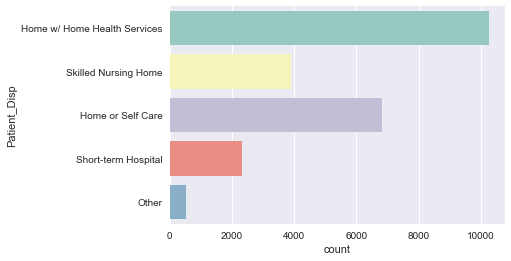

In [47]:
ax8 = sns.countplot(y="Patient_Disp", data=df.rehab,  palette="Set3")

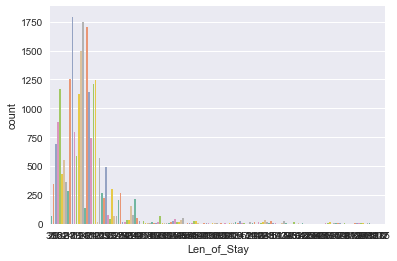

In [48]:
ax9 = sns.countplot(x="Len_of_Stay", data=df.rehab,  palette="Set2")

In [49]:
pd.value_counts(df.rehab.CCS_Proc)
#Mask by finding percentage of occupency
series = pd.value_counts(df.rehab.CCS_Proc)
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
df.rehab['CCS_Proc'] = np.where(df.rehab['CCS_Proc'].isin(series[mask].index),'Other',df.rehab['CCS_Proc'])
#To change the index with sum :
new = series[~mask]
new['Other'] = series[mask].sum()
pd.value_counts(df.rehab.CCS_Proc)

PHYS THER EXER, MANIPUL    11855
NO PROC                     6533
OT PHYS THER/REHAB          2123
DX PHYSICAL THERAPY         1601
Other                       1393
ALCO/DRUG REHAB/DETOX        319
Name: CCS_Proc, dtype: int64

In [50]:
df.rehab1 = pd.get_dummies(df.rehab, columns=['Gender','Age Group', 'Race','Ethnicity', 'Type of Admission', 'Patient_Disp', 'CCS_Diag','CCS_Proc',
                                  'APR Severity of Illness Description','APR Risk of Mortality','Emergency Department Indicator'], drop_first=True)

In [130]:
df.rehab1.head()

,Len_of_Stay,Total_Charges,Gender_M,Age Group_18 to 29,Age Group_30 to 49,Age Group_50 to 69,Age Group_70 or Older,Race_Multi-racial,Race_Other Race,Race_White,...,CCS_Proc_OT PHYS THER/REHAB,CCS_Proc_Other,"CCS_Proc_PHYS THER EXER, MANIPUL",APR Severity of Illness Description_Major,APR Severity of Illness Description_Minor,APR Severity of Illness Description_Moderate,APR Risk of Mortality_Major,APR Risk of Mortality_Minor,APR Risk of Mortality_Moderate,Emergency Department Indicator_Y
11731,36.0,NaN,1,0,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
11735,28.0,NaN,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
11895,17.0,NaN,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
11908,16.0,NaN,0,0,0,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
11931,16.0,NaN,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [110]:
# prints all the unique values for each column 
for column in df.rehab1.columns:
    print(column, ': ', (df.rehab1[column].unique()))

Len_of_Stay :  ['36' '28' '17' '16' '6' '22' '4' '3' '24' '13' '7' '5' '18' '12' '9' '14'
 '30' '8' '15' '21' '11' '10' '48' '20' '1' '25' '19' '35' '37' '23' '32'
 '34' '27' '2' '59' '50' '38' '40' '29' '31' '26' '42' '47' '95' '41'
 '103' '64' '76' '51' '49' '69' '56' '33' '71' '67' '83' '63' '53' '44'
 '120 +' '58' '57' '43' '39' '105' '55' '60' '79' '45' '46' '54' '107'
 '90' '91' '77' '93' '109' '100' '66' '61' '119' '85' 82 29 31 33 20 42 15
 16 9 4 17 53 2 11 23 10 44 13 18 28 14 21 35 8 5 19 69 1 12 7 30 58 37 43
 6 51 3 84 22 46 36 25 24 63 34 59 60 45 27 '99' '68' '52' '116' '84' '65'
 '72' '70' '74' '73' '98' '97' '81' '113' '92' '82' '62' '86' '80' '96'
 '78' '75' '112' '88' '117' '110' '102' '115' '87']
Total_Charges :  ['52,144.05' '41,124.47' '22,527.08' ... '32,622.97' '42,735.00'
 '29,421.05']
Gender_M :  [1 0]
Age Group_18 to 29 :  [0 1]
Age Group_30 to 49 :  [0 1]
Age Group_50 to 69 :  [0 1]
Age Group_70 or Older :  [1 0]
Race_Multi-racial :  [0 1]
Race_Other Race : 

In [8]:
# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in df.rehab1.columns:
    mode = df.rehab1[x].mode().iloc[0]
    unique_count.append([x,len(df.rehab1[x].unique()),df.rehab1[x].isnull().sum(),mode,df.rehab1[x][df.rehab1[x]==mode].count(),df.rehab1[x].dtypes])

print("Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))
pd.DataFrame(unique_count, columns=["Column","Unique","Missing","Mode","Mode Occurence","dtype"]).set_index("Column").T


Dataframe Dimension: 2346931 Rows, 37 Columns


Column,Len_of_Stay,Total_Charges,Gender_M,Age Group_18 to 29,Age Group_30 to 49,Age Group_50 to 69,Age Group_70 or Older,Race_Multi-racial,Race_Other Race,Race_White,...,CCS_Proc_OT PHYS THER/REHAB,CCS_Proc_Other,"CCS_Proc_PHYS THER EXER, MANIPUL",APR Severity of Illness Description_Major,APR Severity of Illness Description_Minor,APR Severity of Illness Description_Moderate,APR Risk of Mortality_Major,APR Risk of Mortality_Minor,APR Risk of Mortality_Moderate,Emergency Department Indicator_Y
Unique,110,23587,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Missing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mode,7,29000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Mode Occurence,1819,11,12479,23039,21667,14904,12244,23673,20161,15846,...,21663,22394,11953,14553,20582,14224,19352,13960,14773,23660
dtype,float64,float64,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,...,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8


In [120]:
#Convert Data Type from Object to Float
df.rehab1["Len_of_Stay"] = df.rehab1.Len_of_Stay.convert_objects(convert_numeric=True)
df.rehab1["Total_Charges"] = df.rehab1.Total_Charges.convert_objects(convert_numeric=True)


In [165]:
df.rehab1.head()

,Len_of_Stay,Total_Charges,Gender_M,Age Group_18 to 29,Age Group_30 to 49,Age Group_50 to 69,Age Group_70 or Older,Race_Multi-racial,Race_Other Race,Race_White,...,CCS_Proc_OT PHYS THER/REHAB,CCS_Proc_Other,"CCS_Proc_PHYS THER EXER, MANIPUL",APR Severity of Illness Description_Major,APR Severity of Illness Description_Minor,APR Severity of Illness Description_Moderate,APR Risk of Mortality_Major,APR Risk of Mortality_Minor,APR Risk of Mortality_Moderate,Emergency Department Indicator_Y
11731,36,"52,144.05",1,0,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
11735,28,"41,124.47",0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
11895,17,"22,527.08",0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
11908,16,"24,697.19",0,0,0,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
11931,16,"26,835.45",0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [5]:
# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in df.rehab1.columns:
    mode = df.rehab1[x].mode().iloc[0]
    unique_count.append([x,len(df.rehab1[x].unique()),df.rehab1[x].isnull().sum(),mode,df.rehab1[x][df.rehab1[x]==mode].count(),df.rehab1[x].dtypes])

print("Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))
pd.DataFrame(unique_count, columns=["Column","Unique","Missing","Mode","Mode Occurence","dtype"]).set_index("Column").T


Dataframe Dimension: 2346931 Rows, 37 Columns


Column,Len_of_Stay,Total_Charges,Gender_M,Age Group_18 to 29,Age Group_30 to 49,Age Group_50 to 69,Age Group_70 or Older,Race_Multi-racial,Race_Other Race,Race_White,...,CCS_Proc_OT PHYS THER/REHAB,CCS_Proc_Other,"CCS_Proc_PHYS THER EXER, MANIPUL",APR Severity of Illness Description_Major,APR Severity of Illness Description_Minor,APR Severity of Illness Description_Moderate,APR Risk of Mortality_Major,APR Risk of Mortality_Minor,APR Risk of Mortality_Moderate,Emergency Department Indicator_Y
Unique,160,23626,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Missing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mode,7,"29,000.00",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Mode Occurence,1793,11,12497,23074,21704,14935,12272,23712,20189,15863,...,21701,22431,11969,14571,20621,14257,19379,13988,14799,23698
dtype,object,object,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,...,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8


In [93]:

list(df.rehab1)

['Len_of_Stay',
 'Total_Charges',
 'Total Costs',
 'Gender_M',
 'Age Group_18 to 29',
 'Age Group_30 to 49',
 'Age Group_50 to 69',
 'Age Group_70 or Older',
 'Race_Multi-racial',
 'Race_Other Race',
 'Race_White',
 'Ethnicity_Not Span/Hispanic',
 'Ethnicity_Spanish/Hispanic',
 'Ethnicity_Unknown',
 'Type of Admission_Emergency',
 'Type of Admission_Not Available',
 'Type of Admission_Trauma',
 'Type of Admission_Urgent',
 'Patient_Disp_Home w/ Home Health Services',
 'Patient_Disp_Other',
 'Patient_Disp_Short-term Hospital',
 'Patient_Disp_Skilled Nursing Home',
 'CCS_Diag_Other aftercare',
 'CCS_Diag_Rehabilitation care; fitting of prostheses; and adjustment of devices',
 'CCS_Proc_DX PHYSICAL THERAPY',
 'CCS_Proc_NO PROC',
 'CCS_Proc_OT PHYS THER/REHAB',
 'CCS_Proc_Other',
 'CCS_Proc_PHYS THER EXER, MANIPUL',
 'APR Severity of Illness Description_Major',
 'APR Severity of Illness Description_Minor',
 'APR Severity of Illness Description_Moderate',
 'APR Risk of Mortality_Major',
 'A

In [90]:
df.rehab.drop(["Health Service Area","Operating Certificate Number","Hospital County","Zip Code - 3 digits","Facility Id","Facility Name","Discharge Year",
         "APR DRG Code","APR DRG Description","APR MDC Description","APR MDC Code","APR Severity of Illness Code","APR Medical Surgical Description",
        "Payment Typology 1", "Payment Typology 2", "Payment Typology 3", "Attending Provider License Number",
        "Operating Provider License Number", "Other Provider License Number", "Birth Weight", "Abortion Edit Indicator",
        "CCS Diagnosis Code", "CCS Procedure Code", "Emergency Department Indicator"],axis=1,inplace=True)

In [422]:
# Load
df = pd.read_csv(r"C:\Users\User\Desktop\2019 Spring\Talem Health\Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv", header =0)
df.rehab = df.loc[df['APR DRG Code'] == 860]
list(df.rehab)

## Processing
# Drop Unwanted
df.rehab.drop(["Health Service Area","Operating Certificate Number","Hospital County","Zip Code - 3 digits","Facility Id","Facility Name","Discharge Year",
         "APR DRG Code","APR DRG Description","APR MDC Description","APR MDC Code","APR Severity of Illness Code","APR Medical Surgical Description",
        "Payment Typology 1", "Payment Typology 2", "Payment Typology 3", "Attending Provider License Number",
        "Operating Provider License Number", "Other Provider License Number", "Birth Weight", "Abortion Edit Indicator",
        "CCS Diagnosis Code", "CCS Procedure Code", "Emergency Department Indicator"],axis=1,inplace=True)


df.rehab.rename(columns= {'Patient Disposition':'Patient_Disp', 'Length of Stay':'Len_of_Stay',
                         'CCS Diagnosis Description':'CCS_Diag','CCS Procedure Description':'CCS_Proc', 
                          'Total Charges':'Total_Charges', 'Total Costs':'Total_Cost'}, inplace=True)


#Mask by finding percentage of occupency
series = pd.value_counts(df.rehab.CCS_Diag)
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
df.rehab['CCS_Diag'] = np.where(df.rehab['CCS_Diag'].isin(series[mask].index),'Other',df.rehab['CCS_Diag'])
#To change the index with sum :
new = series[~mask]
new['Other'] = series[mask].sum()
pd.value_counts(df.rehab.CCS_Diag)

pd.value_counts(df.rehab.Patient_Disp)


#Mask by finding percentage of occupency
series = pd.value_counts(df.rehab.Patient_Disp)
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
df.rehab['Patient_Disp'] = np.where(df.rehab['Patient_Disp'].isin(series[mask].index),'Other',df.rehab['Patient_Disp'])
#To change the index with sum :
new = series[~mask]
new['Other'] = series[mask].sum()

pd.value_counts(df.rehab.CCS_Proc)
#Mask by finding percentage of occupency
series = pd.value_counts(df.rehab.CCS_Proc)
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
df.rehab['CCS_Proc'] = np.where(df.rehab['CCS_Proc'].isin(series[mask].index),'Other',df.rehab['CCS_Proc'])
#To change the index with sum :
new = series[~mask]
new['Other'] = series[mask].sum()
pd.value_counts(df.rehab.CCS_Proc)

df.rehab1 = pd.get_dummies(df.rehab, columns=['Gender','Age Group', 'Race','Ethnicity', 'Type of Admission', 'Patient_Disp', 'CCS_Diag','CCS_Proc',
                                  'APR Severity of Illness Description','APR Risk of Mortality'], drop_first=True)
df.rehab1.shape

(23824, 35)

In [423]:
#Convert Data Type from Object to Float
#Convert Data Type from Object to Float
df.rehab1["Len_of_Stay"] = df.rehab1.Len_of_Stay.convert_objects(convert_numeric=True)
df.rehab1["Total_Charges"] = df.rehab1.Total_Charges.replace({'\$': '', ',': ''}, regex=True)
df.rehab1["Total_Charges"] = df.rehab1.Total_Charges.convert_objects(convert_numeric=True)

df.rehab1["Total_Cost"] = df.rehab1.Total_Cost.replace({'\$': '', ',': ''}, regex=True)
df.rehab1["Total_Cost"] = df.rehab1.Total_Cost.convert_objects(convert_numeric=True)
#Remove Null and Infinite value
df.rehab1 = df.rehab1[pd.notnull(df.rehab1['Len_of_Stay'])]
df.rehab1 = df.rehab1[np.isfinite(df.rehab1['Len_of_Stay'])]


In [424]:
X = df.rehab1[df.rehab1.columns.difference(['Len_of_Stay'])]


# Min-max scaling. Use scaling because data is not normalize
#So, you get output that is misleading. Don't get the result that you want.
# XX and y are array/list

#Formula : (Xi-Xmin)/(Xmax - Xmin)
scaler = MinMaxScaler()
#Then, we need to fit it
XX = scaler.fit_transform(X)
y = df.rehab1[['Len_of_Stay']].values.astype('float64')

In [425]:
#Divide data into Train and Test data-set
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.3, random_state=0)


In [394]:
y_train_df= pd.DataFrame(data=y_train,columns=['Len_of_Stay'])
y_train_df.groupby(['Len_of_Stay'])[['Len_of_Stay']].count().head()

,Len_of_Stay
Len_of_Stay,
1.0,188
2.0,197
3.0,249
4.0,393
5.0,549


In [405]:
#Neural Network
#adam - stochastic gradient-based optimizer, alpha-regularization
clf = MLPRegressor(solver='adam', activation = 'tanh' ,alpha=1e-5,hidden_layer_sizes=(100, 100), random_state=1)
clf.fit(X_train, y_train) 
y_pred_NN = clf.predict(X_test)
print('Returns the coefficient of determination R^2 of the prediction NN: {:.2f}%'.format(clf.score(X_test, y_test) * 100))
mean_squared_error(y_test, y_pred_NN)

Returns the coefficient of determination R^2 of the prediction NN: 77.67%


22.923784639759596

In [396]:
## Can also run a Grid Search Cross Validation, something like

hyper_parameters = dict(solver=['adam','lbfgs', 'sgd'], alpha=[1e-2,1e-3,1e-4],hidden_layer_sizes=[(10, 10),(100, 100)])

grid = GridSearchCV(clf,
                  param_grid=hyper_parameters,
                  scoring='neg_mean_squared_error',
                  cv=10)

grid.fit(X_train, y_train)
y_pred_NNgrid = grid.predict(X_test)
mean_squared_error(y_test, y_pred_NNgrid)

22.90490770028955

In [397]:
print('Returns the coefficient of determination R^2 of the prediction NN: {:.2f}%'.format(clf.score(X_test, y_test) * 100))

Returns the coefficient of determination R^2 of the prediction NN: 77.67%


In [430]:
#NN USing Keras
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], kernel_initializer='normal' ,activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])
history = model.fit(X_train, y_train, validation_split=0.33 ,epochs=150, batch_size=10)

Train on 11154 samples, validate on 5495 samples
Epoch 1/150
11154/11154 [==============================] - 2s 198us/step - loss: 67.4311 - mean_squared_error: 67.4311 - mean_absolute_error: 5.2790 - mean_absolute_percentage_error: 56.7423 - val_loss: 41.1565 - val_mean_squared_error: 41.1565 - val_mean_absolute_error: 3.8868 - val_mean_absolute_percentage_error: 32.8024
Epoch 2/150
11154/11154 [==============================] - 2s 194us/step - loss: 33.5108 - mean_squared_error: 33.5108 - mean_absolute_error: 3.7616 - mean_absolute_percentage_error: 36.9735 - val_loss: 33.7388 - val_mean_squared_error: 33.7388 - val_mean_absolute_error: 3.6348 - val_mean_absolute_percentage_error: 34.2528
Epoch 3/150
11154/11154 [==============================] - 2s 203us/step - loss: 29.7718 - mean_squared_error: 29.7718 - mean_absolute_error: 3.4844 - mean_absolute_percentage_error: 32.6454 - val_loss: 31.1418 - val_mean_squared_error: 31.1418 - val_mean_absolute_error: 3.3222 - val_mean_absolute_pe

11154/11154 [==============================] - 2s 156us/step - loss: 18.4502 - mean_squared_error: 18.4502 - mean_absolute_error: 2.7971 - mean_absolute_percentage_error: 25.2562 - val_loss: 26.3363 - val_mean_squared_error: 26.3363 - val_mean_absolute_error: 3.0595 - val_mean_absolute_percentage_error: 25.7897
Epoch 27/150
11154/11154 [==============================] - 2s 164us/step - loss: 18.3404 - mean_squared_error: 18.3404 - mean_absolute_error: 2.7943 - mean_absolute_percentage_error: 25.1743 - val_loss: 26.3240 - val_mean_squared_error: 26.3240 - val_mean_absolute_error: 2.9569 - val_mean_absolute_percentage_error: 24.7475
Epoch 28/150
11154/11154 [==============================] - 2s 144us/step - loss: 18.0523 - mean_squared_error: 18.0523 - mean_absolute_error: 2.7658 - mean_absolute_percentage_error: 24.8671 - val_loss: 26.2069 - val_mean_squared_error: 26.2069 - val_mean_absolute_error: 3.0510 - val_mean_absolute_percentage_error: 26.0294
Epoch 29/150
11154/11154 [=========

11154/11154 [==============================] - 2s 183us/step - loss: 11.2226 - mean_squared_error: 11.2226 - mean_absolute_error: 2.3196 - mean_absolute_percentage_error: 21.4104 - val_loss: 27.6186 - val_mean_squared_error: 27.6186 - val_mean_absolute_error: 3.0367 - val_mean_absolute_percentage_error: 25.1993
Epoch 77/150
11154/11154 [==============================] - 2s 150us/step - loss: 11.1667 - mean_squared_error: 11.1667 - mean_absolute_error: 2.3128 - mean_absolute_percentage_error: 21.1624 - val_loss: 28.1727 - val_mean_squared_error: 28.1727 - val_mean_absolute_error: 3.2311 - val_mean_absolute_percentage_error: 28.8058
Epoch 78/150
11154/11154 [==============================] - 2s 168us/step - loss: 11.0180 - mean_squared_error: 11.0180 - mean_absolute_error: 2.3094 - mean_absolute_percentage_error: 21.3590 - val_loss: 27.4269 - val_mean_squared_error: 27.4269 - val_mean_absolute_error: 3.1270 - val_mean_absolute_percentage_error: 27.9522
Epoch 79/150
11154/11154 [=========

11154/11154 [==============================] - 2s 155us/step - loss: 8.4473 - mean_squared_error: 8.4473 - mean_absolute_error: 2.0555 - mean_absolute_percentage_error: 19.4173 - val_loss: 29.7669 - val_mean_squared_error: 29.7669 - val_mean_absolute_error: 3.2083 - val_mean_absolute_percentage_error: 27.0036
Epoch 127/150
11154/11154 [==============================] - 2s 144us/step - loss: 8.3877 - mean_squared_error: 8.3877 - mean_absolute_error: 2.0478 - mean_absolute_percentage_error: 19.1994 - val_loss: 29.4766 - val_mean_squared_error: 29.4766 - val_mean_absolute_error: 3.1529 - val_mean_absolute_percentage_error: 25.8053
Epoch 128/150
11154/11154 [==============================] - 2s 146us/step - loss: 8.6288 - mean_squared_error: 8.6288 - mean_absolute_error: 2.0638 - mean_absolute_percentage_error: 19.4615 - val_loss: 29.0062 - val_mean_squared_error: 29.0062 - val_mean_absolute_error: 3.0959 - val_mean_absolute_percentage_error: 25.3316
Epoch 129/150
11154/11154 [============

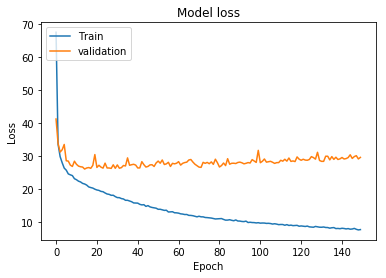

In [432]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [409]:
model.summary()
# make a prediction
y_pred_NN_keras = model.predict(X_test)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (y_test[0], y_pred_NN_keras[0]))
mean_squared_error(y_test, y_pred_NN_keras)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               3500      
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 13,701
Trainable params: 13,701
Non-trainable params: 0
_________________________________________________________________
X=[16.], Predicted=[34.284794]


33.6188269653099

In [433]:
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])
history = model.fit(X_train, y_train, validation_split=0.33 ,epochs=20, batch_size=10)

Train on 11154 samples, validate on 5495 samples
Epoch 1/20
11154/11154 [==============================] - 2s 212us/step - loss: 7.7018 - mean_squared_error: 7.7018 - mean_absolute_error: 1.9644 - mean_absolute_percentage_error: 18.4599 - val_loss: 29.5411 - val_mean_squared_error: 29.5411 - val_mean_absolute_error: 3.0812 - val_mean_absolute_percentage_error: 25.1350
Epoch 2/20
11154/11154 [==============================] - 2s 161us/step - loss: 7.6622 - mean_squared_error: 7.6622 - mean_absolute_error: 1.9469 - mean_absolute_percentage_error: 18.1266 - val_loss: 28.8828 - val_mean_squared_error: 28.8828 - val_mean_absolute_error: 3.0609 - val_mean_absolute_percentage_error: 24.7088
Epoch 3/20
11154/11154 [==============================] - 2s 200us/step - loss: 7.7143 - mean_squared_error: 7.7143 - mean_absolute_error: 1.9574 - mean_absolute_percentage_error: 18.2932 - val_loss: 30.6382 - val_mean_squared_error: 30.6382 - val_mean_absolute_error: 3.2612 - val_mean_absolute_percentage_

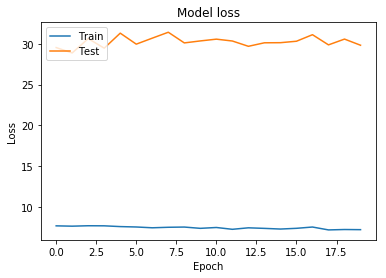

In [434]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [435]:
model.summary()
# make a prediction
y_pred_NN_keras = model.predict(X_test)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (y_test[0], y_pred_NN_keras[0]))
mean_squared_error(y_test, y_pred_NN_keras)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               3500      
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 13,701
Trainable params: 13,701
Non-trainable params: 0
_________________________________________________________________
X=[16.], Predicted=[19.743645]


33.77436924477886

In [ ]:
'''The actual MSE is simply the positive version of the number you're getting.

The unified scoring API always maximizes the score, so scores which need to be minimized are negated in order for the unified scoring API to work correctly. The score that is returned is therefore negated when it is a score that should be minimized and left positive if it is a score that should be maximized.'''
results

In [262]:
X_test1

,APR Risk of Mortality_Major,APR Risk of Mortality_Minor,APR Risk of Mortality_Moderate,APR Severity of Illness Description_Major,APR Severity of Illness Description_Minor,APR Severity of Illness Description_Moderate,Age Group_18 to 29,Age Group_30 to 49,Age Group_50 to 69,Age Group_70 or Older,...,Patient_Disp_Skilled Nursing Home,Race_Multi-racial,Race_Other Race,Race_White,Total_Charges,Total_Cost,Type of Admission_Emergency,Type of Admission_Not Available,Type of Admission_Trauma,Type of Admission_Urgent
1585151,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,156727.67,46256.88,0,0,0,0
1516561,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,10849.58,6326.89,1,0,0,0
12764,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,10790.94,7043.79,0,0,0,0
1623091,0,0,1,1,0,0,0,0,0,1,...,0,0,0,1,85406.15,25807.08,0,0,0,0
1643590,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,63778.33,19303.90,0,0,0,0
1438753,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,65217.93,18742.09,0,0,0,0
1634277,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,109501.83,32075.74,0,0,0,0
1797923,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,17668.00,6713.66,0,0,0,0
250812,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,34160.05,18253.40,0,0,0,1
818078,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,35281.70,16986.86,0,0,0,0


In [399]:
#Assign data for GLM model
X1 = df.rehab1[df.rehab1.columns.difference(['Len_of_Stay'])]
y1 = df.rehab1[['Len_of_Stay']].values.astype('float64')

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)


In [400]:
# Instantiate a poisson family model with the default link function.
Poisson_model = sm.GLM(y_train1, X_train1, family=sm.families.Poisson())
Poisson_results = Poisson_model.fit()
ypred_glm = Poisson_results.predict(X_test1)
print(Poisson_results.summary())
Poisson_results.pvalues

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                16649
Model:                            GLM   Df Residuals:                    16615
Model Family:                 Poisson   Df Model:                           33
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -56572.
Date:                Mon, 29 Apr 2019   Deviance:                       41376.
Time:                        13:21:34   Pearson chi2:                 5.09e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------

APR Risk of Mortality_Major                                                        1.422074e-19
APR Risk of Mortality_Minor                                                        6.498733e-24
APR Risk of Mortality_Moderate                                                     5.162374e-24
APR Severity of Illness Description_Major                                          8.106496e-02
APR Severity of Illness Description_Minor                                          9.046811e-75
APR Severity of Illness Description_Moderate                                       1.693104e-26
Age Group_18 to 29                                                                 5.330186e-13
Age Group_30 to 49                                                                 1.718346e-14
Age Group_50 to 69                                                                 7.898333e-35
Age Group_70 or Older                                                              4.987706e-28
CCS_Diag_Other aftercare                

In [401]:
# Instantiate a Gaussian family model with the default link function.
Gaussian_model = sm.GLM(y_train1, X_train1, family=sm.families.Gaussian())
Gaussian_results = Gaussian_model.fit()
ypred_glm_Gaussian = Gaussian_results.predict(X_test1)
print(Gaussian_results.summary())
Gaussian_results.pvalues

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                16649
Model:                            GLM   Df Residuals:                    16615
Model Family:                Gaussian   Df Model:                           33
Link Function:               identity   Scale:                          34.022
Method:                          IRLS   Log-Likelihood:                -52967.
Date:                Mon, 29 Apr 2019   Deviance:                   5.6527e+05
Time:                        13:21:35   Pearson chi2:                 5.65e+05
No. Iterations:                     3   Covariance Type:             nonrobust
                                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------

APR Risk of Mortality_Major                                                       9.746229e-12
APR Risk of Mortality_Minor                                                       3.530016e-18
APR Risk of Mortality_Moderate                                                    1.298230e-16
APR Severity of Illness Description_Major                                         3.642145e-02
APR Severity of Illness Description_Minor                                         6.303271e-09
APR Severity of Illness Description_Moderate                                      3.373091e-05
Age Group_18 to 29                                                                1.779743e-12
Age Group_30 to 49                                                                1.630672e-24
Age Group_50 to 69                                                                2.055066e-38
Age Group_70 or Older                                                             2.641717e-35
CCS_Diag_Other aftercare                          

In [402]:
# Instantiate a Gaussian family model with the default link function.
Gamma_model = sm.GLM(y_train1, X_train1, family=sm.families.Gamma())
Gamma_results = Gamma_model.fit()
ypred_glm_Gamma = Gamma_results.predict(X_test1)
print(Gamma_results.summary())
Gamma_results.pvalues

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                16649
Model:                            GLM   Df Residuals:                    16615
Model Family:                   Gamma   Df Model:                           33
Link Function:          inverse_power   Scale:                         0.28184
Method:                          IRLS   Log-Likelihood:                -62833.
Date:                Mon, 29 Apr 2019   Deviance:                       9116.5
Time:                        13:21:39   Pearson chi2:                 4.68e+03
No. Iterations:                    86   Covariance Type:             nonrobust
                                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------

APR Risk of Mortality_Major                                                        2.653301e-04
APR Risk of Mortality_Minor                                                        2.471646e-01
APR Risk of Mortality_Moderate                                                     2.598959e-01
APR Severity of Illness Description_Major                                          6.572236e-01
APR Severity of Illness Description_Minor                                          8.298937e-55
APR Severity of Illness Description_Moderate                                       8.594487e-33
Age Group_18 to 29                                                                 6.973978e-86
Age Group_30 to 49                                                                 1.032266e-64
Age Group_50 to 69                                                                1.469457e-147
Age Group_70 or Older                                                             4.536001e-120
CCS_Diag_Other aftercare                

In [403]:
#Test AIC for Poisson and Gaussian model to see which one has lower AIC.
print("Gamma AIC: ",Gamma_results.aic)
print("Poisson AIC : ",Poisson_results.aic)
print("Gaussian AIC: ",Gaussian_results.aic)

#Compare MSE for both Poisson and Gaussian model.
print("Gamma MSE: ",mean_squared_error(y_test1, ypred_glm_Gamma))
print("Poisson MSE : ",mean_squared_error(y_test1, ypred_glm))
print("Gaussian MSE: ",mean_squared_error(y_test1, ypred_glm_Gaussian))



Gamma AIC:  125733.09501794293
Poisson AIC :  113212.1088980607
Gaussian AIC:  106002.84003780955
Gamma MSE:  5089.995467835171
Poisson MSE :  203.48584304181688
Gaussian MSE:  34.76728739433163


In [106]:
#Distribute Data into test&train data-set. 
X1 = df.rehab1[df.rehab1.columns.difference(['Len_of_Stay'])].values.astype('float64')
y1 = df.rehab1[['Len_of_Stay']].values.astype('float64')
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)


In [463]:
#Run Boosting model
gbrt=GradientBoostingRegressor(loss= 'ls',learning_rate = 0.01,n_estimators=1000) 
gbrt.fit(X_train1, y_train1) 
y_pred_gbm=gbrt.predict(X_test1)

In [464]:
print("Feature Importances" )
#One of the benefits of growing trees is that we can understand how important each of the features are
print(gbrt.feature_importances_)
print( "R-squared for Train: %.2f" %gbrt.score(X_train1, y_train1))
print( "R-squared for Test: %.2f" %gbrt.score(X_test1, y_test1))
mean_squared_error(y_test1, y_pred_gbm)

Feature Importances
[5.41754313e-03 3.63225685e-03 3.79947668e-03 1.90941105e-03
 2.71747010e-03 1.50283948e-03 2.00973927e-03 1.31734744e-02
 4.24111745e-03 2.06200240e-02 2.87370713e-03 6.67563582e-05
 1.10647926e-04 2.44525073e-02 3.93450103e-02 1.26651412e-02
 4.99508681e-02 1.08557542e-02 7.98050611e-03 1.56732241e-04
 9.88823254e-04 1.80791179e-05 1.43249770e-03 6.70014165e-03
 2.31996896e-02 1.19126835e-02 5.06702068e-03 2.18978611e-02
 2.48945085e-01 3.93994366e-01 5.09182860e-02 0.00000000e+00
 0.00000000e+00 2.74444832e-02]
R-squared for Train: 0.80
R-squared for Test: 0.76


24.97025285124851

In [109]:
print(__doc__)

import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

Automatically created module for IPython interactive environment


In [113]:
import plotly 
plotly.tools.set_credentials_file(username='lalala0730', api_key='2tEIIDHFWJ0h0zLn8ZfQ')

In [457]:
params = {'n_estimators': 1000, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'ls', 'max_features':2, 'subsample':0.5}
gbrt = ensemble.GradientBoostingRegressor(**params)

gbrt.fit(X_train1, y_train1)
mse = mean_squared_error(y_test1, gbrt.predict(X_test1))
print("MSE: %.4f" % mse)

MSE: 25.0484


In [336]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbrt.staged_predict(X_test1)):
    test_score[i] = gbrt.loss_(y_test1, y_pred)


train = go.Scatter(x=np.arange(params['n_estimators']) + 1, 
                   y=gbrt.train_score_, 
                   name='Training Set LS',
                   mode='lines',
                   line=dict(color='blue')
                  )
test = go.Scatter(x=np.arange(params['n_estimators']) + 1, 
                  y=test_score, 
                  mode='lines',
                  name='Test Set Deviance',
                  line=dict(color='red')
                 )

layout = go.Layout(title='Least Square Loss',
                   xaxis=dict(title='Boosting Iterations'),
                   yaxis=dict(title='Test Set Deviance')
                  )
fig = go.Figure(data=[train], layout=layout)

In [407]:
fig = go.Figure(data=[train], layout=layout)
py.iplot(fig)


In [174]:
print(__doc__)


import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
from sklearn import ensemble
from sklearn import datasets

Automatically created module for IPython interactive environment


In [332]:

data = []

for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('learning_rate=0.1' 'subsample=0.01' ,'turquoise',
                               {'learning_rate': 0.1, 'subsample': 0.01}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5,  max_features: log2', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5, 'max_features': 'log2'}),
                              ('learning_rate=0.1, max_features=2', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 2 })]:
    
    params = {'n_estimators': 1000, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'ls'}
    params.update(setting)

    clf = ensemble.GradientBoostingRegressor(**params)
    clf.fit(X_train1, y_train1)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_predict(X_test1)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test1, y_pred)

    trace = go.Scatter(x=(np.arange(test_deviance.shape[0]) + 1)[::5], 
                       y=test_deviance[::5],
                       mode='lines',
                       line=dict(color=color, width=1),
                       name=label)
#    trace = go.Scatter(x=np.arange(params['n_estimators']) + 1, 
#                  y=test_score, 
#                  mode='lines',
#                  name='Test Set Deviance',
#                  line=dict(color='red')
#                 )
    data.append(trace)
    
layout = go.Layout(xaxis=dict(title='Boosting Iterations'),
                   yaxis=dict(title='Test Set Deviance'))

fig = go.Figure(data=data, layout=layout)

In [333]:
print(test_score.shape)
print(test_deviance[1])

(10,)
103.82060707676402


In [334]:
py.iplot(fig)


In [114]:
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

trace = go.Bar(x=feature_importance[sorted_idx],
               y=np.array(list(df.rehab1))[sorted_idx],
               orientation = 'h'
              )

layout = go.Layout(xaxis=dict(title='Relative Importance'),
                   yaxis=dict(title='Variable Importance')
                  )
fig1 = go.Figure(data=[trace], layout=layout)

In [344]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
rf.fit(X_train1, y_train1)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test1)
# Calculate the absolute errors
errors = abs(predictions - y_test1)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 9.26 degrees.


In [350]:
df.rehab1.columns

Index(['Len_of_Stay', 'Total_Charges', 'Total_Cost', 'Gender_M',
       'Age Group_18 to 29', 'Age Group_30 to 49', 'Age Group_50 to 69',
       'Age Group_70 or Older', 'Race_Multi-racial', 'Race_Other Race',
       'Race_White', 'Ethnicity_Not Span/Hispanic',
       'Ethnicity_Spanish/Hispanic', 'Ethnicity_Unknown',
       'Type of Admission_Emergency', 'Type of Admission_Not Available',
       'Type of Admission_Trauma', 'Type of Admission_Urgent',
       'Patient_Disp_Home w/ Home Health Services', 'Patient_Disp_Other',
       'Patient_Disp_Short-term Hospital', 'Patient_Disp_Skilled Nursing Home',
       'CCS_Diag_Other aftercare',
       'CCS_Diag_Rehabilitation care; fitting of prostheses; and adjustment of devices',
       'CCS_Proc_DX PHYSICAL THERAPY', 'CCS_Proc_NO PROC',
       'CCS_Proc_OT PHYS THER/REHAB', 'CCS_Proc_Other',
       'CCS_Proc_PHYS THER EXER, MANIPUL',
       'APR Severity of Illness Description_Major',
       'APR Severity of Illness Description_Minor',
    

In [355]:
# Saving feature names for later use
feature_list = list(X1.columns)

In [385]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:


# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [437]:
#Run Random Forest Model
regr = RandomForestRegressor(random_state=0, n_estimators=1000)
regr.fit(X_train1, y_train1)
y_pred_RF = regr.predict(X_test1)

In [438]:
#Returns the coefficient of determination R^2 of the prediction.
print("Feature Importances" )
#One of the benefits of growing trees is that we can understand how important each of the features are
print(regr.feature_importances_)
print( "R-squared for Train: %.2f" %regr.score(X_train1, y_train1))
print( "R-squared for Test: %.2f" %regr.score(X_test1, y_test1))
mean_squared_error(y_test1, y_pred_RF)

Feature Importances
[4.71732276e-03 4.30484659e-03 3.19192254e-03 4.35172270e-03
 2.80097411e-03 5.04443750e-03 2.20861180e-03 4.14361977e-03
 5.00256430e-03 7.26111126e-03 1.06296614e-03 2.16481693e-03
 1.42996099e-03 4.24364140e-02 8.72149757e-03 1.07509842e-02
 8.42312614e-03 4.79599867e-03 2.72677971e-03 1.50022552e-03
 5.24063090e-03 5.45262128e-03 3.30974810e-03 3.92909666e-03
 7.24858223e-03 5.90742171e-04 5.15839639e-03 6.83438096e-03
 1.20056663e-01 6.89983050e-01 1.41489374e-02 2.37127227e-05
 6.08950118e-07 1.09829258e-02]
R-squared for Train: 0.97
R-squared for Test: 0.81


19.419467571188342

In [38]:
print(__doc__)

import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

Automatically created module for IPython interactive environment


In [439]:
#Run Bayesian Ridge Model
reg = linear_model.BayesianRidge()
reg.fit(X_train1, y_train1)
y_pred_bay = reg.predict(X_test1)
mean_squared_error(y_test1, y_pred_bay)

33.58691829876806

In [359]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

Automatically created module for IPython interactive environment


In [482]:
# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
#Run Bayesian Ridge Model
#reg = linear_model.BayesianRidge()
#reg.fit(X_train1, y_train1)
#y_pred_bay = reg.predict(X_test1)
#mean_squared_error(y_test1, y_pred_bay)


clf = BayesianRidge(compute_score=True)
clf.fit(X_train1, y_train1)

ols = LinearRegression()
ols.fit(X_train1, y_train1)
#clf.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [442]:
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
n_features = X_train1.shape[1]
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))

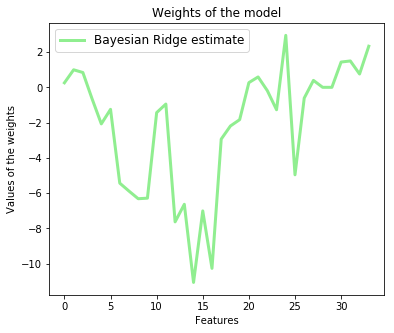

In [516]:
#The coefficient weights are slightly shifted toward zeros, which stabilises them
# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 3
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
#plt.plot(ols.coef_, color='red', linestyle='-', 
#         label="OLS estimate")
#plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))
plt.show()



In [521]:
np.full(len(relevant_features), 5.)
n_features

34

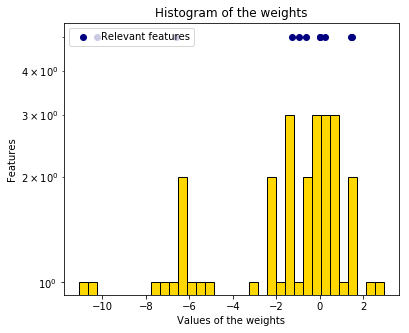

In [445]:
#As the prior on the weights is a Gaussian prior, the histogram of the estimated weights is Gaussian.

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

Text(0.5, 0, 'Iterations')

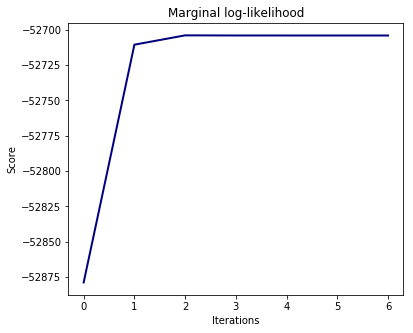

In [446]:
#The estimation of the model is done by iteratively maximizing the marginal log-likelihood of the observations.


plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")

In [447]:
ex_var_GLM = explained_variance_score(y_test1, ypred_glm_Gaussian, multioutput='raw_values')
ex_var_GBM = explained_variance_score(y_test1, y_pred_gbm, multioutput='raw_values')
ex_var_RFM = explained_variance_score(y_test1, y_pred_RF, multioutput='raw_values')
ex_var_BRM = explained_variance_score(y_test1, y_pred_bay, multioutput='raw_values')
ex_var_NNM = explained_variance_score(y_test1, y_pred_NNgrid, multioutput='raw_values')

In [448]:
print("GLM Explained Variance Score is ",ex_var_GLM)
print("BRM Explained Variance Score is ",ex_var_BRM)
print("GBM Explained Variance Score is ",ex_var_GBM)
print("RFM Explained Variance Score is ",ex_var_RFM)
print("NNM Explained Variance Score is ",ex_var_NNM)
#Explained Variance Score. Best possible score is 1, lower is worse.

GLM Explained Variance Score is  [0.66142225]
BRM Explained Variance Score is  [0.67286342]
GBM Explained Variance Score is  [0.75671886]
RFM Explained Variance Score is  [0.81097359]
NNM Explained Variance Score is  [0.77692484]


In [449]:
#They are negatively-oriented scores, which means lower values are better.
MAE_GLM = mean_absolute_error(y_test1, ypred_glm_Gaussian, multioutput='raw_values')
MAE_GBM = mean_absolute_error(y_test1, y_pred_gbm, multioutput='raw_values')
MAE_RFM = mean_absolute_error(y_test1, y_pred_RF, multioutput='raw_values')
MAE_BRM = mean_absolute_error(y_test1, y_pred_bay, multioutput='raw_values')
MAE_NNM = mean_absolute_error(y_test1, y_pred_NNgrid, multioutput='raw_values')

In [450]:
print("GLM Mean absolute error is ",MAE_GLM)
print("BRM Mean absolute error is ",MAE_BRM)
print("GBM Mean absolute error is ",MAE_GBM)
print("RFM Mean absolute error is ",MAE_RFM)
print("NNM Mean absolute error is ",MAE_NNM)
#lower values are better.

GLM Mean absolute error is  [3.64789004]
BRM Mean absolute error is  [3.56318948]
GBM Mean absolute error is  [2.89822287]
RFM Mean absolute error is  [2.30780802]
NNM Mean absolute error is  [2.82376061]


In [451]:
print("GLM R Squared is ",r2_score(y_test1, ypred_glm_Gaussian))
print("BRM R Squared is ",r2_score(y_test1, y_pred_bay))
print("GBM R Squared is ",r2_score(y_test1, y_pred_gbm))
print("RFM R Squared is ",r2_score(y_test1, y_pred_RF))
print("NNM R Squared is ",r2_score(y_test1, y_pred_NNgrid))
#It provides a measure of how well future samples are likely to be predicted by the model. 
#Best possible score is 1

GLM R Squared is  0.6613486492499292
BRM R Squared is  0.6728460543843147
GBM R Squared is  0.7567138601336936
RFM R Squared is  0.810844347755979
NNM R Squared is  0.7768943592426081


In [455]:
print("GLM MSE is ",mean_squared_error(y_test1, ypred_glm_Gaussian))
print("BRM MSE is ",mean_squared_error(y_test1, y_pred_bay))
print("GBM MSE is ",mean_squared_error(y_test1, y_pred_gbm))
print("RFM MSE is ",mean_squared_error(y_test1, y_pred_RF))
print("NNM MSE is ",mean_squared_error(y_test1, y_pred_NNgrid))
#The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.
#Lower MSE is better

GLM MSE is  34.76728739433163
BRM MSE is  33.58691829876806
GBM MSE is  24.976717574151497
RFM MSE is  19.419467571188342
NNM MSE is  22.90490770028955
